In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression


In [2]:
mydata = pd.read_csv('datasets/rent_price_dataset_buca.csv')

In [3]:
mydata.shape

(138, 7)

In [4]:
mydata.describe()

,num_rooms,gross,building_age,furnishing_status,price
count,138.000000,138.00000,138.000000,138.000000,138.000000
mean,3.173913,104.92029,13.311594,0.297101,5615.942029
std,0.853614,37.65170,10.236475,0.458646,1752.255955
min,2.000000,40.00000,0.000000,0.000000,2000.000000
25%,2.000000,66.25000,5.000000,0.000000,5000.000000
50%,3.000000,110.00000,11.000000,0.000000,5000.000000
75%,4.000000,133.75000,21.000000,1.000000,6000.000000
max,5.000000,200.00000,37.000000,1.000000,15000.000000


In [5]:
mydata.columns

Index(['location', 'num_rooms', 'gross', 'building_age', 'floor_type',
       'furnishing_status', 'price'],
      dtype='object')

In [6]:
mydata.dtypes

location             object
num_rooms             int64
gross                 int64
building_age          int64
floor_type           object
furnishing_status     int64
price                 int64
dtype: object

In [7]:
mydata.rename(columns={'gross':'mt_square'},inplace=True)

In [8]:
mydata.dtypes

location             object
num_rooms             int64
mt_square             int64
building_age          int64
floor_type           object
furnishing_status     int64
price                 int64
dtype: object

In [9]:
mydata.head()

,location,num_rooms,mt_square,building_age,floor_type,furnishing_status,price
0,merkez,4,135,18,intermediate,0,6000
1,merkez,2,50,4,intermediate,1,5000
2,merkez,2,60,0,intermediate,0,6000
3,merkez,2,55,0,intermediate,0,6000
4,merkez,2,55,0,intermediate,0,6000


In [10]:
mydata.groupby('floor_type')['price'].mean()['intermediate']

np.float64(5801.88679245283)

In [11]:
mydata.groupby('floor_type')['price'].mean()['ground']

np.float64(4800.0)

In [12]:
mydata.groupby('floor_type')['price'].mean()['top']

np.float64(5800.0)

In [13]:
mydata.groupby('floor_type')['price'].mean()['garden']

np.float64(5500.0)

In [14]:
mydata['floor_type'] = mydata['floor_type'].map({'intermediate':1000,'ground':827.3,'top':999.7,'garden':948}).copy()

In [15]:
mydata.isna().sum()

location             0
num_rooms            0
mt_square            0
building_age         0
floor_type           0
furnishing_status    0
price                0
dtype: int64

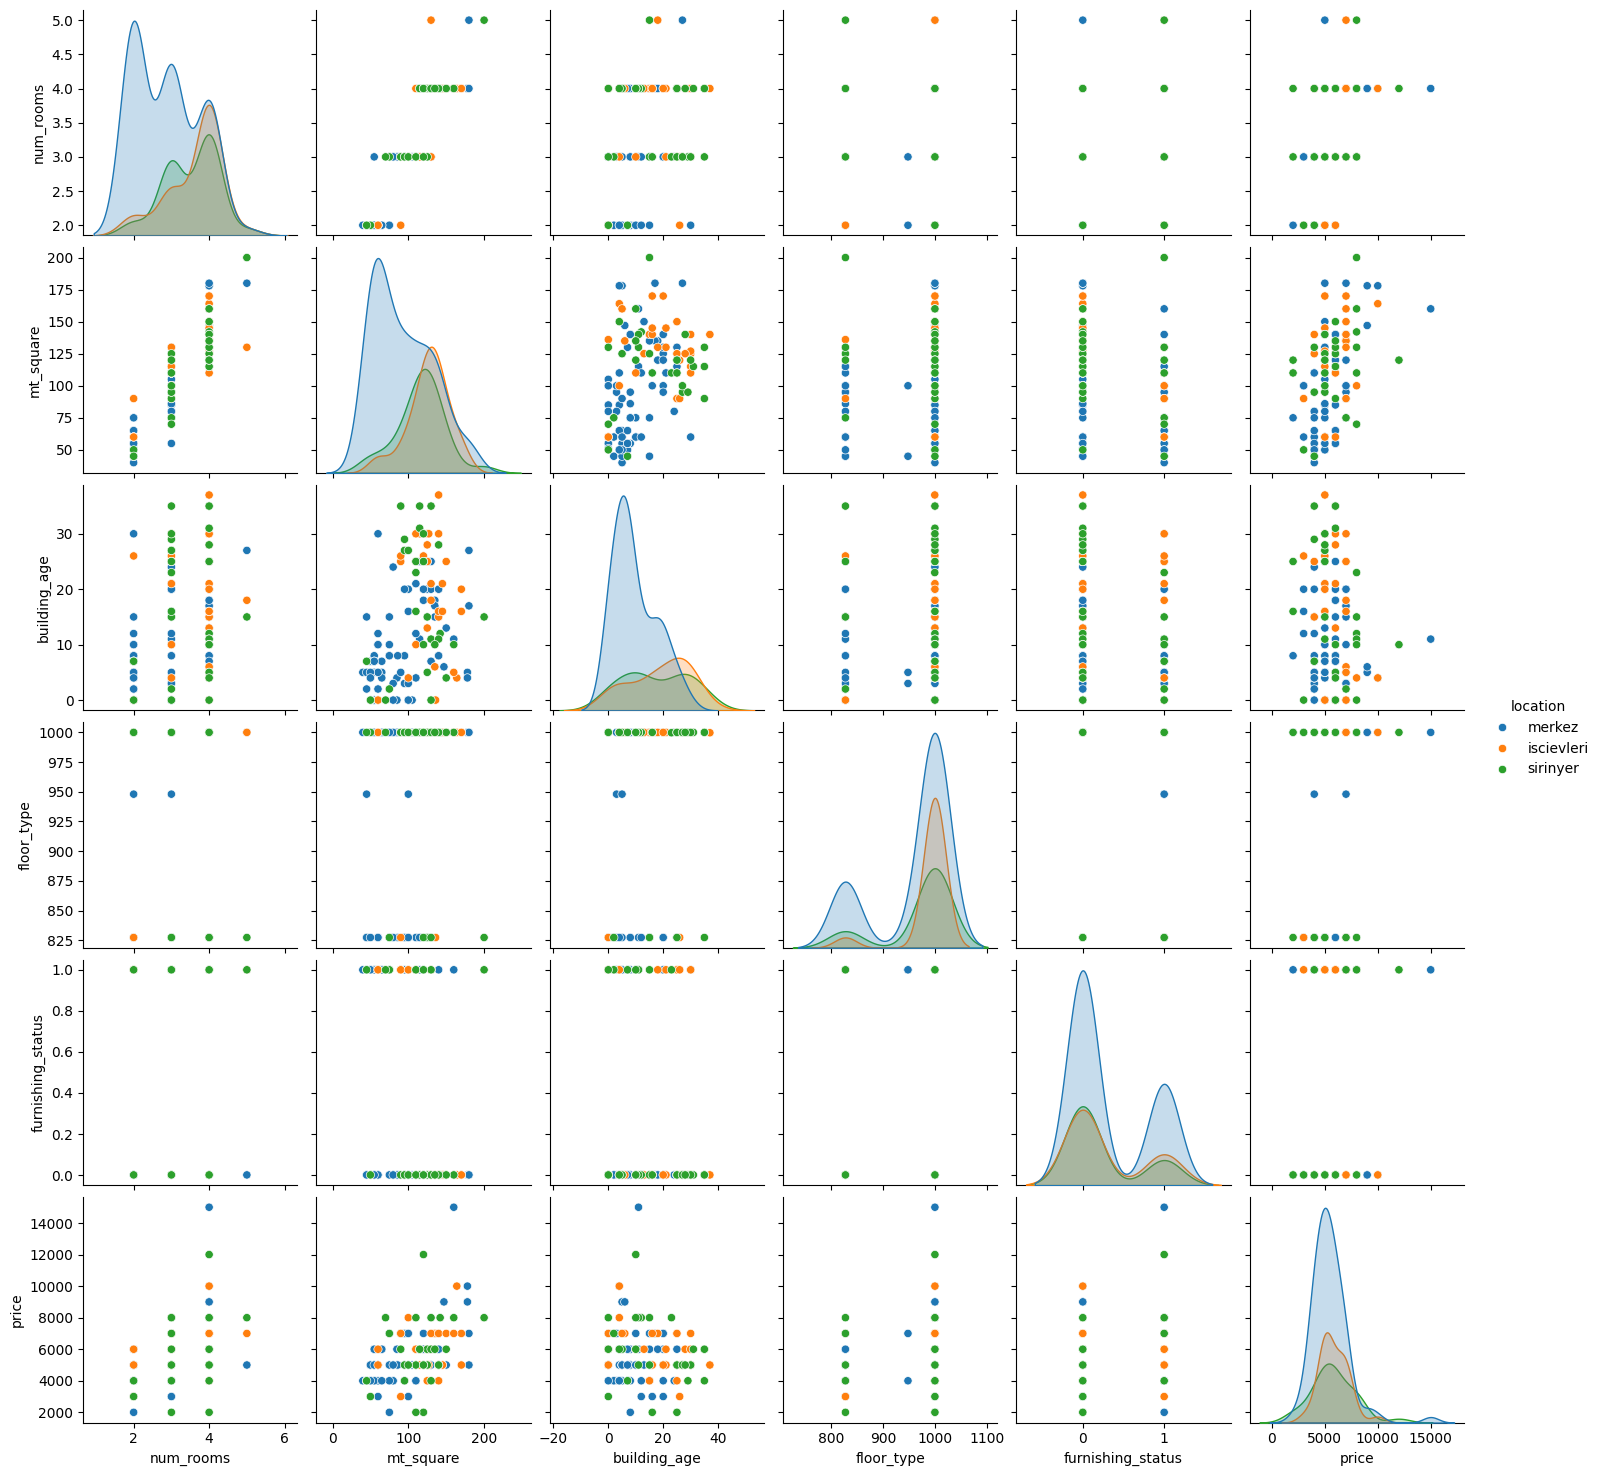

In [16]:
sns.pairplot(mydata,vars=['num_rooms','mt_square','building_age','floor_type','furnishing_status','price'],hue='location')

In [17]:
mydata_corr = mydata[['num_rooms','mt_square',
    'building_age','floor_type','furnishing_status','price']].corr()
mydata_corr


,num_rooms,mt_square,building_age,floor_type,furnishing_status,price
num_rooms,1.000000,0.910231,0.428134,0.127406,-0.356668,0.425621
mt_square,0.910231,1.000000,0.395973,0.125768,-0.338880,0.450707
building_age,0.428134,0.395973,1.000000,0.085474,-0.183107,-0.117397
floor_type,0.127406,0.125768,0.085474,1.000000,0.041281,0.220788
furnishing_status,-0.356668,-0.338880,-0.183107,0.041281,1.000000,0.161181
price,0.425621,0.450707,-0.117397,0.220788,0.161181,1.000000


In [18]:
mydata.groupby('location')['price'].mean()['merkez']

np.float64(5461.538461538462)

In [19]:
mydata.groupby('location')['price'].mean()['sirinyer']

np.float64(5793.103448275862)

In [20]:
mydata.groupby('location')['price'].mean()['iscievleri']

np.float64(5838.709677419355)

In [21]:
mydata['location'] = mydata['location'].map({'merkez':1000,'sirinyer':827.3,'iscievleri':999.7}).copy()

In [22]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
y = mydata['price']
X = mydata.drop(columns=['price'])

In [24]:
pipe = Pipeline([('scale',StandardScaler()),
                 ('model',KNeighborsRegressor(n_neighbors = 2))])

In [25]:
pipe.fit(X,y);

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=2))],
 'transform_input': None,
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=2),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 2,
 'model__p': 2,
 'model__weights': 'uniform'}

In [28]:
data_CV = GridSearchCV(estimator=pipe,
                       param_grid={'model__n_neighbors': [6,7,8,9,10,11,12,13,14]},
                       cv=5)

In [29]:
data_CV.fit(X,y);
pd.DataFrame(data_CV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004680,0.001375,0.003515,0.001198,6,{'model__n_neighbors': 6},0.373915,0.392361,0.325003,0.036364,0.460202,0.317569,0.147136,1
1,0.004205,0.000277,0.002680,0.000180,7,{'model__n_neighbors': 7},0.361772,0.420759,0.295890,-0.038590,0.468218,0.301610,0.179635,4
2,0.003526,0.000165,0.002309,0.000095,8,{'model__n_neighbors': 8},0.393966,0.422933,0.307463,-0.073011,0.489480,0.308166,0.199351,3
3,0.003000,0.000134,0.001977,0.000094,9,{'model__n_neighbors': 9},0.393858,0.402713,0.312692,0.007407,0.462204,0.315775,0.161367,2
4,0.002530,0.000195,0.001606,0.000083,10,{'model__n_neighbors': 10},0.356560,0.372188,0.336214,-0.021909,0.444174,0.297445,0.163768,5
5,0.002611,0.000778,0.001481,0.000233,11,{'model__n_neighbors': 11},0.328211,0.339833,0.324707,0.019083,0.411129,0.284593,0.136433,6
6,0.002124,0.000089,0.001395,0.000057,12,{'model__n_neighbors': 12},0.291709,0.349320,0.293020,-0.017235,0.406871,0.264737,0.147236,7
7,0.002023,0.000026,0.001371,0.000045,13,{'model__n_neighbors': 13},0.236224,0.349898,0.277225,0.069661,0.377118,0.262025,0.108507,8
8,0.001964,0.000052,0.001308,0.000022,14,{'model__n_neighbors': 14},0.199360,0.356957,0.255724,0.106122,0.376263,0.258885,0.100285,9


In [30]:
pipe_new = Pipeline([('scale',StandardScaler()),
                 ('model',KNeighborsRegressor(n_neighbors = 6))])

In [31]:
pipe_new.fit(X,y);

In [32]:
new_predict = pipe_new.predict(X)

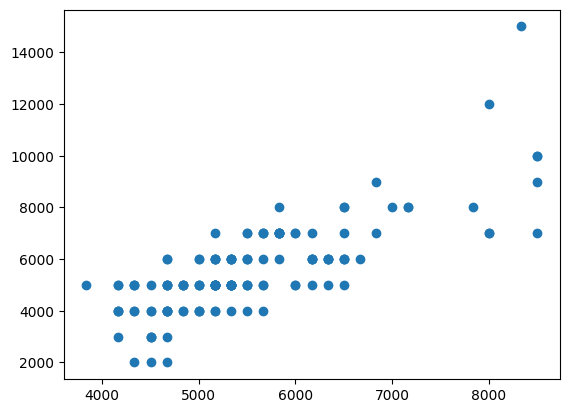

In [33]:
plt.scatter(new_predict,y)

In [40]:
from sklearn.linear_model import Ridge

In [41]:
new_pipe = Pipeline([('scale',StandardScaler()),
                 ('model',Ridge())])

In [42]:
new_pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', Ridge())])

In [43]:
new_pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', Ridge())],
 'transform_input': None,
 'verbose': False,
 'scale': StandardScaler(),
 'model': Ridge(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__alpha': 1.0,
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__max_iter': None,
 'model__positive': False,
 'model__random_state': None,
 'model__solver': 'auto',
 'model__tol': 0.0001}

In [44]:
data_CV_new = GridSearchCV(estimator=new_pipe,
                       param_grid={'model__alpha': [0.01, 0.1, 1, 10, 100]},
                       cv=5)

In [45]:
data_CV_new.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [0.01, 0.1, 1, 10, 100]})

In [46]:
pd.DataFrame(data_CV_new.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003238,0.000984,0.001427,0.000290,0.01,{'model__alpha': 0.01},0.218063,0.349743,0.447953,0.126792,-0.464030,0.135704,0.319329,5
1,0.002964,0.000478,0.001382,0.000324,0.10,{'model__alpha': 0.1},0.218255,0.350617,0.447745,0.127489,-0.461512,0.136519,0.318466,4
2,0.002842,0.000015,0.001355,0.000007,1.00,{'model__alpha': 1},0.220125,0.359069,0.445640,0.134300,-0.437001,0.144427,0.310062,3
3,0.001934,0.000547,0.001257,0.001031,10.00,{'model__alpha': 10},0.234676,0.421412,0.424041,0.188247,-0.247611,0.204153,0.245286,2
4,0.001519,0.000062,0.000749,0.000034,100.00,{'model__alpha': 100},0.238969,0.457180,0.277963,0.267256,0.116927,0.271659,0.109076,1


In [47]:
pipe_new_new = Pipeline([('scale',StandardScaler()),
                 ('model',Ridge(alpha = 100))])

In [48]:
pipe_new_new.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', Ridge(alpha=100))])

In [49]:
new_predict = pipe_new_new.predict(X)

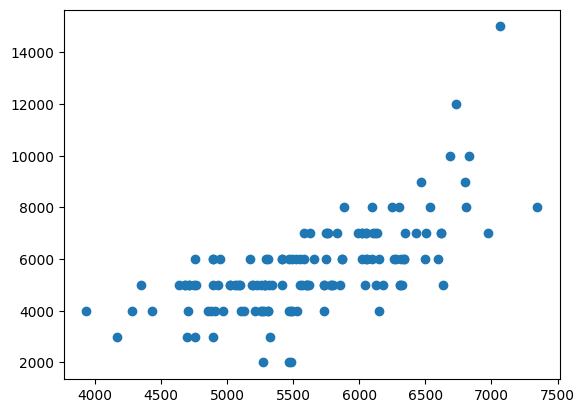

In [50]:
plt.scatter(new_predict,y)